In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [1]:
pip install -U notebook-as-pdf

  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61087 sha256=a7e594fa1bb31d5b08ec4f57fb888ed52424017c0bab66d36a802c292954f654
  Stored in directory: c:\users\dell_owner\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Loading Dataset
wine = pd.read_csv('C:/Users/Dell_Owner/Desktop/archive/winequality_red.csv')
info = wine.info()
info = pd.DataFrame(info)
info
wine.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

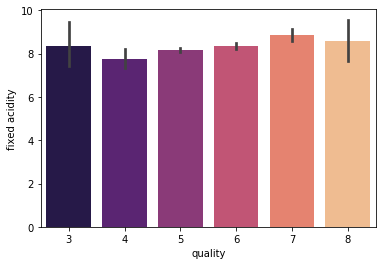

In [5]:
plot = sns.barplot(x= 'quality',y='fixed acidity',data=wine,palette = "magma")
plot.get_figure().savefig('graph_1.png', bbox_inches='tight')

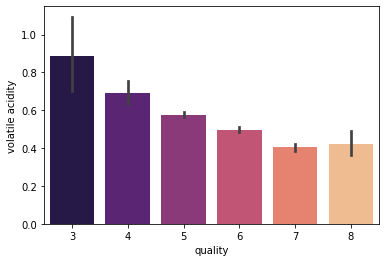

In [6]:
# We can see that as quality improves volatile acidity decreases.
plot = sns.barplot(x= 'quality',y='volatile acidity',data=wine,palette = "magma")
plot.get_figure().savefig('graph_2.png', bbox_inches='tight')

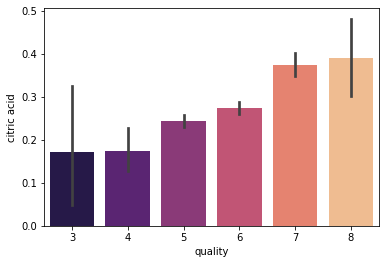

In [7]:
# As quality improves citric acid increases.
plot = sns.barplot(x= 'quality',y='citric acid',data=wine,palette = "magma")
plot.get_figure().savefig('graph_3.png', bbox_inches='tight')

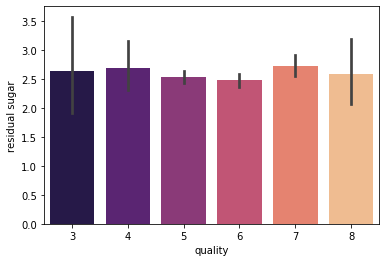

In [8]:
plot = sns.barplot(x= 'quality',y='residual sugar',data=wine,palette = "magma")
plot.get_figure().savefig('graph_4.png', bbox_inches='tight')

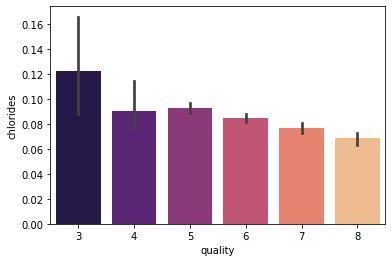

In [9]:
#As quality improves chlorides decrease.
plot = sns.barplot(x = 'quality', y = 'chlorides', data = wine,palette = "magma")
plot.get_figure().savefig('graph_5.png', bbox_inches='tight')

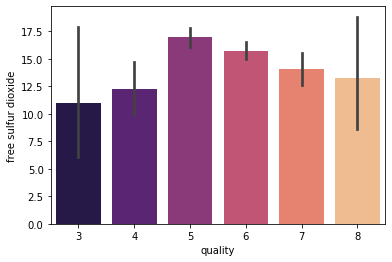

In [10]:
plot = sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine,palette = "magma")
plot.get_figure().savefig('graph_6.png', bbox_inches='tight')

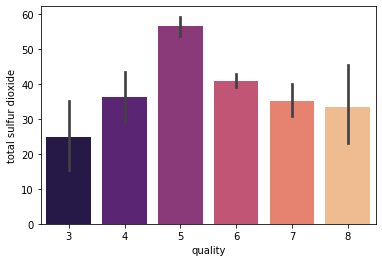

In [11]:
plot = sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine,palette = "magma")
plot.get_figure().savefig('graph_7.png', bbox_inches='tight')

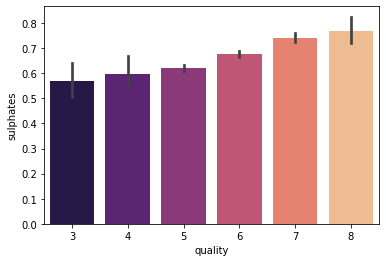

In [12]:
# There is a increase in sulphates with the quality improvement.
plot = sns.barplot(x = 'quality', y = 'sulphates', data = wine,palette = "magma")
plot.get_figure().savefig('graph_8.png', bbox_inches='tight')

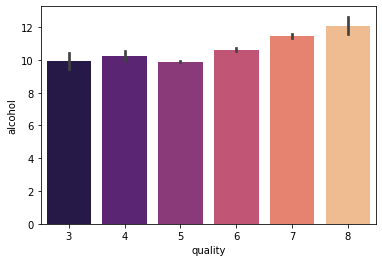

In [13]:
#Alcohol level also goes higher as te quality of wine increases
plot = sns.barplot(x = 'quality', y = 'alcohol', data = wine,palette = "magma")
plot.get_figure().savefig('graph_9.png', bbox_inches='tight')

In [14]:
wine[['quality']] = wine['quality'].apply(lambda x : 0 if x <= 6 else 1)
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

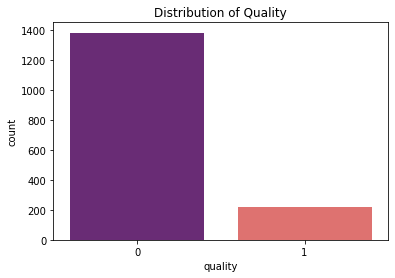

In [15]:
plot = sns.countplot(wine['quality'],palette = "magma").set_title('Distribution of Quality')
plot.get_figure().savefig('data.png', bbox_inches='tight')

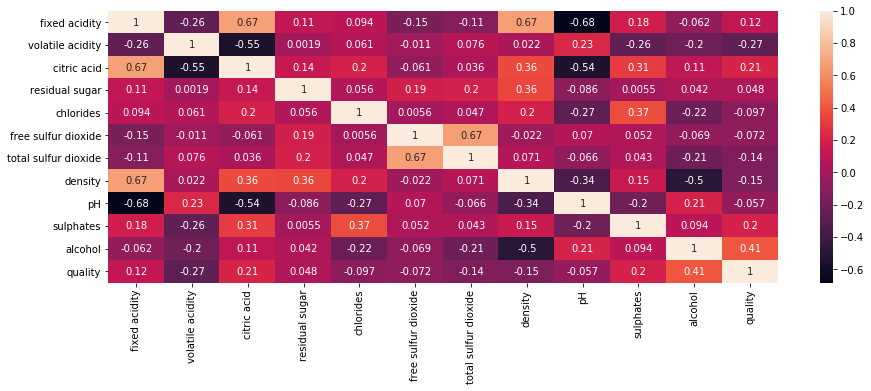

In [16]:
corrMatrix = wine.corr().T
plt.figure(figsize = (15,5))
plot = sns.heatmap(corrMatrix, annot=True)
plt.show()
plot.get_figure().savefig('corr.png', bbox_inches='tight')

In [17]:
X = wine.drop('quality',axis=1)
y = wine['quality']

# Correlation

In [18]:
quality_corr = wine.corr()['quality']
quality_corr.abs().sort_values(ascending = True)[1:]
pd.DataFrame(quality_corr).abs().sort_values('quality',ascending = False)

,quality
quality,1.000000
alcohol,0.407315
volatile acidity,0.270712
citric acid,0.214716
sulphates,0.199485
density,0.150460
total sulfur dioxide,0.139517
fixed acidity,0.120061
chlorides,0.097308
free sulfur dioxide,0.071747


# VIF

In [19]:
# VIF dataframe 
X = pd.DataFrame(X)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data = vif_data.sort_values('VIF',ascending = True).reset_index().drop('index',axis=1)
vif_data

,feature,VIF
0,residual sugar,4.662992
1,free sulfur dioxide,6.442682
2,total sulfur dioxide,6.519699
3,chlorides,6.554877
4,citric acid,9.183495
5,volatile acidity,17.060026
6,sulphates,21.590621
7,fixed acidity,74.452265
8,alcohol,124.394866
9,pH,1070.967685


In [20]:
wine_d = wine[['density','pH','fixed acidity','free sulfur dioxide','residual sugar']]
wine_new = wine.drop(wine_d,axis=1)

In [21]:
X = wine_new.drop('quality',axis=1)
y = wine_new['quality']

In [22]:
# VIF dataframe 
X = pd.DataFrame(X)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data = vif_data.sort_values('VIF',ascending = True).reset_index().drop('index',axis=1)
vif_data

,feature,VIF
0,total sulfur dioxide,3.016395
1,citric acid,4.585894
2,chlorides,5.883856
3,volatile acidity,12.432127
4,sulphates,20.534793
5,alcohol,29.058065


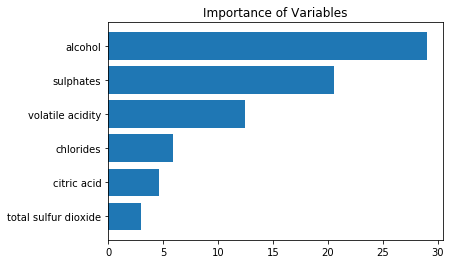

In [23]:
plt.barh(vif_data['feature'],vif_data['VIF'])
plt.title('Importance of Variables')
plt.savefig('data', bbox_inches='tight')

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier,Lasso, LassoCV, lars_path
from sklearn.linear_model import LassoLarsIC as LIC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.svm import SVC

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [26]:
scaler = preprocessing.StandardScaler().fit(X_train)

# LassoLarsIC

In [27]:
model_LassoLarsIC = LIC(criterion='aic')
model_LassoLarsIC.fit(scaler.transform(X_train), y_train) 

LassoLarsIC()

In [28]:
pred_IC = model_LassoLarsIC.predict(scaler.transform((X_test))) 

In [29]:
metrics.mean_squared_error(y_true=y_test, y_pred=pred_IC)

0.0814046367687273

In [30]:
model_LassoLarsIC.score(scaler.transform(X_train), y_train)

0.23885969379734484

# OLS 

In [31]:
full_model = sm.OLS(y_train,scaler.transform(X_train)).fit()

In [32]:
pred_OLS = full_model.predict(scaler.transform((X_test)))

In [33]:
metrics.mean_squared_error(y_true=y_test, y_pred=pred_OLS)

0.09472195973788514

In [34]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.205
Model:                            OLS   Adj. R-squared (uncentered):              0.201
Method:                 Least Squares   F-statistic:                              51.14
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                    3.81e-56
Time:                        18:31:19   Log-Likelihood:                         -400.00
No. Observations:                1199   AIC:                                      812.0
Df Residuals:                    1193   BIC:                                      842.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0434      0.012     -3.549      0.000      -0.067      -0.019
x2             0.0317      0.012      2.572      0.010       0.008       0.056
x3            -0.0366      0.011     -3.222      0.001      -0.059      -0.014
x4            -0.0275      0.010     -2.740      0.006      -0.047      -0.008
x5             0.0549      0.011      4.863      0.000       0.033       0.077
x6             0.1112      0.011     10.546      0.000       0.091       0.132
==============================================================================
Omnibus:                      221.132   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.499
Skew:                           1.221   Prob(JB):                     1.42e-78
Kurtosis:                       4.100   Cond. No.                         2.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# LassoCV

In [35]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(X, y)

LassoCV(cv=5, normalize=True)

In [36]:
model_lassoCV.coef_

array([-0.19323559,  0.17046061, -0.65220668, -0.00072392,  0.29905345,
        0.10540116])

In [37]:
X.columns[np.abs(model_lassoCV.coef_) > 0]

Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')

In [38]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(scaler.transform(X_train), y_train)

LassoCV(cv=5, normalize=True)

In [39]:
pred_CV = model_lassoCV.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_CV)

0.08138277997715009

In [40]:
model_lassoCV.score(scaler.transform(X_train), y_train)

0.2388588698159202

# Ridge

In [41]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(scaler.transform(X_train), y_train)

Ridge(alpha=0.5)

In [42]:
pred_reg = reg.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_reg)

0.08140244396077007

In [43]:
reg.score(scaler.transform(X_train), y_train)

0.2388596715948461

# Logistic Regression

In [44]:
model_log = LogisticRegression(solver = 'lbfgs',random_state=0)
model_log.fit(scaler.transform(X_train), y_train)

LogisticRegression(random_state=0)

In [45]:
pred_log = model_log.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_log)

0.1175

In [47]:
model_log.coef_

array([[-0.6055306 ,  0.20928377, -0.5057934 , -0.47893816,  0.57239011,
         0.95583857]])

In [48]:
model_log.intercept_

array([-2.70596632])

In [49]:
model_log.score(scaler.transform(X_train), y_train)

0.8748957464553795

In [50]:
scores = cross_val_score(model_log, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

C:\Users\Dell_Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross-Validation Accuracy Scores [0.84166667 0.85       0.88333333 0.89166667 0.86666667 0.88333333
 0.85833333 0.86666667 0.90833333 0.8487395 ]


C:\Users\Dell_Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell_Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [51]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8416666666666667, 0.869873949579832, 0.9083333333333333)

In [52]:
cm = confusion_matrix(y_true=y_test, y_pred=pred_log)
print('confusion matrix:\n', cm)

confusion matrix:
 [[340  15]
 [ 32  13]]


In [53]:
tn, fp, fn, tp = cm.ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')

tn: 340, fp: 15, fn: 32, tp: 13


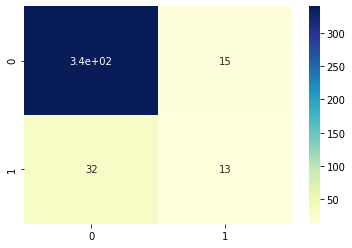

In [54]:
plot = sns.heatmap(pd.DataFrame(cm), annot = True, cmap="YlGnBu")
plot.get_figure().savefig('cm.png', bbox_inches='tight')

In [55]:
print('classification report:\n', classification_report(y_test, pred_log))

classification report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       355
           1       0.46      0.29      0.36        45

    accuracy                           0.88       400
   macro avg       0.69      0.62      0.65       400
weighted avg       0.86      0.88      0.87       400



In [56]:
predict_prob = model_log.predict_proba(X_test)

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:, 1])
print('AUC: {:.2f}'.format(auc(fpr, tpr)))

AUC: 0.70


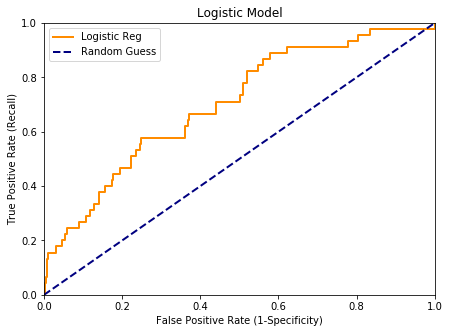

In [58]:
plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'Logistic Reg')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('Logistic Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

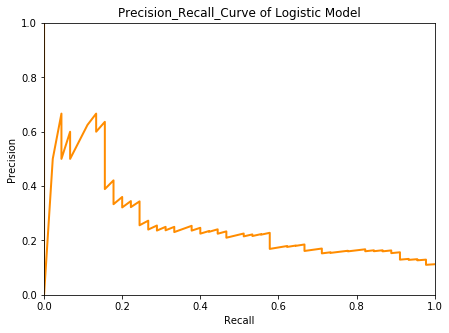

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, predict_prob[:,1] )

plt.figure(figsize = (7, 5))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve of Logistic Model')
plt.show();